In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv("autosmpgdata.csv")
df.head(25)

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN,NAME
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
# La colonne HP n'est pas numérique
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   CYLINDERS     398 non-null    int64  
 2   DISPLACEMENT  398 non-null    float64
 3   HP            398 non-null    object 
 4   WEIGHT        398 non-null    int64  
 5   ACCELERATION  398 non-null    float64
 6   YEAR          398 non-null    int64  
 7   ORIGIN        398 non-null    int64  
 8   NAME          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
# Rendre la colonne HP numérique
df['HP'] = pd.to_numeric(df['HP'], errors = 'coerce') # ‘coerce’, NaN pour un  champs non valide

In [5]:
# La colonne HP contient 6 entrées non valides
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   CYLINDERS     398 non-null    int64  
 2   DISPLACEMENT  398 non-null    float64
 3   HP            392 non-null    float64
 4   WEIGHT        398 non-null    int64  
 5   ACCELERATION  398 non-null    float64
 6   YEAR          398 non-null    int64  
 7   ORIGIN        398 non-null    int64  
 8   NAME          398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [6]:
# Afficher les 6 lignes a supprimer
df[df['HP'].isna()]

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN,NAME
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [7]:
# Supprimer toutes les lignes non valides
df = df.dropna(axis = 0) # Si la valeur d'une cellule est NaN supprimer toute la ligne
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   CYLINDERS     392 non-null    int64  
 2   DISPLACEMENT  392 non-null    float64
 3   HP            392 non-null    float64
 4   WEIGHT        392 non-null    int64  
 5   ACCELERATION  392 non-null    float64
 6   YEAR          392 non-null    int64  
 7   ORIGIN        392 non-null    int64  
 8   NAME          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [8]:
# La colonne 'NAME' n'est pas descriminante
# 392/301 ~ 1.30, trop de valeurs uniques, donc peu de valeurs qui se répètent
df['NAME'].value_counts()

amc matador            5
ford pinto             5
toyota corolla         5
toyota corona          4
amc hornet             4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: NAME, Length: 301, dtype: int64

In [9]:
#stats = df.describe(percentiles = [0.1, 0.5,0.8])
stats = df.describe()
stats

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
df = df.drop('NAME', axis = 1) # Colonne supprimée % des 392 enregistrements.

In [11]:
df.corr()

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
CYLINDERS,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
DISPLACEMENT,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
HP,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
WEIGHT,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
ACCELERATION,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
YEAR,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
ORIGIN,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<AxesSubplot:>

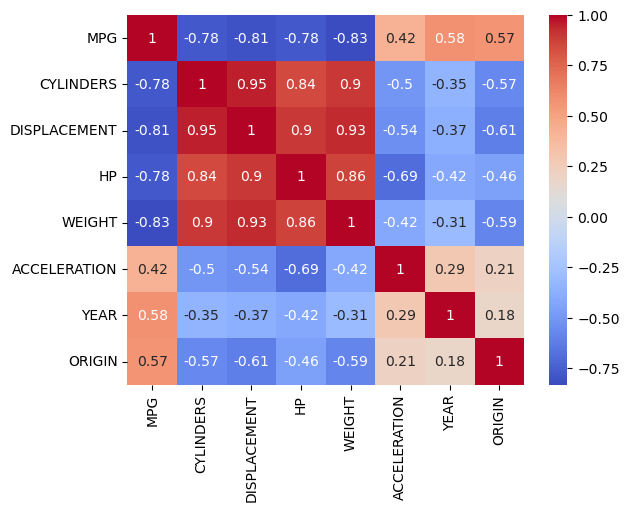

In [12]:
# Voyons la corrélation des autres variables et la colonne MPG pour sélectionner les meilleures attributs
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [13]:
# normalisation (valeur-moyenne)/std
df_normalized = ((df-df.mean())/df.std())
df_normalized

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.715726
1,-1.082115,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.715726
2,-0.697747,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.715726
3,-0.953992,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.715726
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.715726
...,...,...,...,...,...,...,...,...
393,0.455359,-0.862911,-0.519972,-0.479835,-0.220842,0.021267,1.634321,-0.715726
394,2.633448,-0.862911,-0.930889,-1.363154,-0.997859,3.283479,1.634321,0.525711
395,1.095974,-0.862911,-0.567753,-0.531795,-0.803605,-1.428605,1.634321,-0.715726
396,0.583482,-0.862911,-0.711097,-0.661694,-0.415097,1.108671,1.634321,-0.715726


In [14]:
#stats = df.describe(percentiles = [0.1, 0.5,0.8])
stats = df_normalized.describe()
stats

,MPG,CYLINDERS,DISPLACEMENT,HP,WEIGHT,ACCELERATION,YEAR,ORIGIN
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-3.554413e-16,-4.316275e-16,-1.016760e-16,-3.231542e-16,5.211251e-17,6.171934e-15,4.180330e-16,2.917168e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.850853e+00,-1.449152e+00,-1.208019e+00,-1.519034e+00,-1.606522e+00,-2.733490e+00,-1.623241e+00,-7.157264e-01
25%,-8.258696e-01,-8.629108e-01,-8.544397e-01,-7.656144e-01,-8.857216e-01,-6.402369e-01,-8.088504e-01,-7.157264e-01
50%,-8.916306e-02,-8.629108e-01,-4.148541e-01,-2.849846e-01,-2.049490e-01,-1.497955e-02,5.540071e-03,-7.157264e-01
75%,7.116049e-01,1.482053e+00,7.772830e-01,5.593651e-01,7.501341e-01,5.377842e-01,8.199306e-01,5.257105e-01
max,2.966568e+00,1.482053e+00,2.490234e+00,3.261284e+00,2.545808e+00,3.355973e+00,1.634321e+00,1.767147e+00


In [15]:
data= df.drop('MPG', axis = 1)
target=df['MPG'].values
target=(np.rint(target)).astype(int)

In [16]:
# 85% données d'entrainement, 15% données de test
x_train,x_test,y_train,y_test=train_test_split(data, target, test_size=0.15,random_state=0)

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import r2_score

In [62]:
# Non-linear regression model using RBF SVM kernel, C=1, default value of gamma.
model = SVC(kernel='rbf',C=10000000)
model.fit(x_train.values, y_train)

SVC(C=10000000)

In [63]:
pred=model.predict(x_test.values)

In [64]:
a=pd.DataFrame({'Real':y_test.reshape(-1),'Predict':pred.reshape(-1)})
a.head(25)

,Real,Predict
0,28,30
1,22,20
2,12,13
3,38,34
4,34,32
5,19,22
6,38,32
7,30,27
8,20,18
9,20,19


In [65]:
print("training dataset: ", model.score(x_train.values, y_train))

training dataset:  0.7747747747747747


In [66]:
print("testing ", model.score(x_test.values, y_test))

testing  0.2542372881355932


In [68]:
print("accuracy: ", r2_score(y_test,pred))

accuracy:  0.8738873575729911


In [77]:
from sklearn.metrics import mean_absolute_error
# Make predictions on the test set and calculate the mean absolute error
pred = model.predict(x_test.values)
mae = mean_absolute_error(y_test, pred)
print("Mean absolute error:", mae)

Mean absolute error: 1.9491525423728813


In [74]:
def predict_mpg():
    car=[]
    cylinders = int(input("How many cylinders in your car: "))
    displacement = int(input("What is the displacement of your car: "))
    horsepower = int(input("What is the horsepower of your car: "))
    weight = int(input("What is the weight of your car: "))
    acceleration = int(input("What is the acceleration of your car: "))
    year = int(input("What is the year of your car: "))
    origin = int(input("What is the origin of your car: "))
    
    car.append(cylinders)
    car.append(displacement)
    car.append(horsepower)
    car.append(weight)
    car.append(acceleration)
    car.append(year)
    car.append(origin)
    
    x_text = [car]
    mpg = model.predict(x_text)
    print("We predict that your car will consum {} MPG".format(mpg[0]))

In [75]:
predict_mpg()

How many cylinders in your car: 8
What is the displacement of your car: 307
What is the horsepower of your car: 130
What is the weight of your car: 3504
What is the acceleration of your car: 12
What is the year of your car: 70
What is the origin of your car: 1
We predict that your car will consum 17 MPG
